<a href="https://colab.research.google.com/github/m-a-hasan/ai-colab/blob/main/09_milestone_project_2_SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7a1900aa-c2ab-f921-b2bc-405be676368b)


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.


In [ ]:
!ls pubmed-rct/

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


dev is same as validation set.

Difference between 200k and 20k is same data just less.

Difference between numbers_replaced_with_at_sign is every number is replaced with @

In [ ]:
# Check files
import os
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
def get_lines(filename):
  """
  This function will return lines of a file

  Args
  -----
  filename: filepath of a document

  Returns
  --------
  List of lines
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Prepare data
- When the line begins with "###" mark it as a new abstract with abstract ID
> - Keep total number of lines in the abstract
- If the line starts with "\n" mark it as the end of the abstract.
- Before "\t" is the label
- After "\t" is the sentence


Create a dictionary (name-value pair) of
- line (line number in the abstract)
- target (label)
- total_lines (number of lines in the abstract)
- text

In [ ]:
abstract_lines = ""
abstract_samples = []
abstract_line_split = ""

input_lines = get_lines(data_dir + "train.txt")
input_lines = input_lines[:20]
line_number = 0

for line in input_lines:
  line_number += 1
  if line.startswith("###"):
    abstract_id = line
    abstract_lines = "" # reset lines
    print(f"------- Inside IF {line_number} ---------")
    print(f"line: {line}abstract_lines: {abstract_lines}\n abstract_id: {abstract_id}abstract_line_split: {abstract_line_split}")
  elif line.isspace(): # checking an empty line.
    abstract_line_split = abstract_lines.splitlines() # split all the lines into one list of strings
    #iterate through lines in the list of lines
    for abstract_line_number, abstract_line in enumerate(abstract_line_split):
      line_data = {} # empty dictionary to hold data
      text_split = abstract_line.split("\t")
      line_data["target"] = text_split[0]
      line_data["text"] = text_split[1]
      line_data["line_number"] = abstract_line_number
      line_data["total_lines"] = len(abstract_line_split)
      abstract_samples.append(line_data)

    print(f"------- Inside ELSEIF {line_number} ---------")
    print(f"line: {line}abstract_lines: {abstract_lines}\n abstract_id: {abstract_id}abstract_line_split: {abstract_line_split}")
  else: # line contains a labeled sentence
    abstract_lines += line
    print(f"------- Inside ELSE {line_number} ---------")
    print(f"line: {line}abstract_lines: {abstract_lines}\n abstract_id: {abstract_id}abstract_line_split: {abstract_line_split}")

print("=========================================")
print(abstract_samples)

------- Inside IF 1 ---------
line: ###24293578
abstract_lines: 
 abstract_id: ###24293578
abstract_line_split: 
------- Inside ELSE 2 ---------
line: OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
abstract_lines: OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .

 abstract_id: ###24293578
abstract_line_split: 
------- Inside ELSE 3 ---------
line: METHODS	A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .
abstract_lines: 

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """
  Processing a file by reading each lines and creating a list of dictionaries.

  Args:
  ------
  filename: filepath of the file that needs to be processed

  Returns:
  ---------
  A list of dictionaries with,
    - line number of the abstract
    - label of the line
    - total number of lines of that abstract
    - text
  e.g.
  [{
    "line_number": 2,
    "target": "abstract",
    "total_lines": 14,
    "text": "Pain was assessed using the visual analog pain scale ( @-@ mm ) ."
  }]
  """

  abstract_lines = ""
  abstract_samples = []

  input_lines = get_lines(filename)

  # Iterate through each lines of the file
  for line in input_lines:
    if line.startswith("###"):
      abstract_lines = "" # reset abstract_lines as this is the start of a new abstract
    elif line.isspace(): # checking for an empty line which means the end of the abstract
      abstract_line_split = abstract_lines.splitlines() # split all the lines of the abstract into one list of strings
      for abstract_line_number, abstract_line in enumerate(abstract_line_split): # iterate through list of lines of the abstract
        line_data = {} # create empty dictionary to hold data
        abstract_text_split = abstract_line.split("\t") # split the target and text of the line

        line_data["target"] = abstract_text_split[0]
        line_data["text"] = abstract_text_split[1]
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split)

        abstract_samples.append(line_data)
    else: # line contains lebeled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
# Get data from file and pre-process it
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

In [ ]:
train_samples[:3]

[{'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 12}]

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head(5)

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,12
1,METHODS,A total of @ patients with primary knee OA wer...,1,12
2,METHODS,Outcome measures included pain reduction and i...,2,12
3,METHODS,Pain was assessed using the visual analog pain...,3,12
4,METHODS,Secondary outcome measures included the Wester...,4,12


In [ ]:
# Data analysis
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

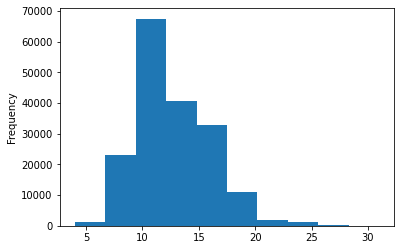

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
# Get list of sentences
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences), train_sentences[:10]

(180040,
 30212,
 30135,
 ['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
  'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were me

There are 2 ways to transform label from text to number
- one hot encoding (it perfroms better with loss function)
- label encoded labels

In [ ]:
# One hot encode target
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1, 1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Label encode labels (get target and encode them into integers)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# We can use classes_ to get class information from LabelEncoder
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

Model 0: TF-IDF multinominal Naive-Bayes (baseline)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# First create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline
model_0.fit(X=train_sentences,
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate model_0 accuracy
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

72.1% is our base accuracy

In [ ]:
# Predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
# Get helper function for comparison
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-01 04:47:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-01 04:47:32 (95.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Get baseline results
from helper_functions import calculate_results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

Preparing for deep sequence model
- Get average length of sentences (make all the sentences same size using padding)
- Create vectorizer (change text to number)
- Create embedding (capture relationship between those numbers)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

#sent_lens = [len(sentence.split()) for sentence in train_sentences]
# above line is same as below
sentence_length = []
for sentence in train_sentences:
  words = sentence.split()
  words_count = len(words)
  sentence_length.append(words_count)

avg_sentence_length = np.mean(sentence_length)

avg_sentence_length

26.338269273494777

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <a list of 10 Patch objects>)

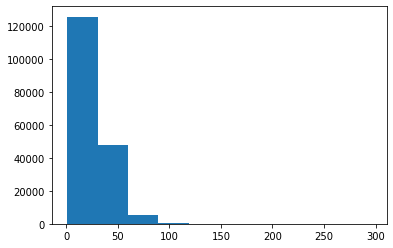

In [ ]:
# Visualize sentence lengths
import matplotlib.pyplot as plt
plt.hist(sentence_length)

In [ ]:
# Value that covers 95% of the lengths
output_seq_len = np.percentile(sentence_length, 95)
output_seq_len

55.0

55 is our magic number. During tokenization, sentences with less than 55 words will be padded with 0 to make it 55 words. Words that are more than 55 will be truncated.

In [ ]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

In [ ]:
# Create TextVectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=55)

In [ ]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Check text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text: {target_sentence}")
print(f"Word count: {len(target_sentence.split())}")
print(f"Vectorized: {text_vectorizer(target_sentence)}")

Text: This trial is registered with ( NCT@ ) on @ April @ .
Word count: 13
Vectorized: [  23   32   20  394    7  176   18 1441    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
# Get more details about vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of word in vocabulary: {len(rct_20k_text_vocab)}")
print(f"Most frequent words in vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least frequent words in vocabulary: {rct_20k_text_vocab[-5:]}")

Number of word in vocabulary: 64841
Most frequent words in vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least frequent words in vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# get configuration of the text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

Text vectorizer converted text to number. Now, we will create relationship among those numbers using embedding.

Only thing we care about while creating embedding is, input and output dimension.

In [ ]:
from pandas._libs.tslibs import vectorized
# Token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim=128,
                               mask_zero=True,
                               name="token_embedding")

print(f"Sentence text: {target_sentence}\n\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Vectorized sentence: {vectorized_sentence}\n\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Embedded sentence: {embedded_sentence}\n\n")
print(f"Shape of the sentence embedding {embedded_sentence.shape}")

Sentence text: This trial is registered with ( NCT@ ) on @ April @ .


Vectorized sentence: [[  23   32   20  394    7  176   18 1441    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


Embedded sentence: [[[-0.01785117 -0.0251601  -0.03162167 ... -0.02826744 -0.0101978
    0.02055589]
  [ 0.02889956  0.03671903  0.01963339 ... -0.00113211  0.01913801
   -0.00036383]
  [ 0.04344796  0.03750401 -0.02136343 ...  0.03432966  0.03764621
   -0.00402573]
  ...
  [-0.00315378 -0.00553374  0.01318904 ...  0.02465178  0.01906459
   -0.00284135]
  [-0.00315378 -0.00553374  0.01318904 ...  0.02465178  0.01906459
   -0.00284135]
  [-0.00315378 -0.00553374  0.01318904 ...  0.02465178  0.01906459
   -0.00284135]]]


Shape of the sentence embedding (1, 55, 128)


We want to turn the data into batched PrefetchDataset
- Much faster to load data into GPU
- Use batch()
- Use prefetch()
- Use tf.data.AUTOTUNE for optimization

In [ ]:
# Turn data into tensorflow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Input (text) -> Tokenize -> Embedding -> Layers -> Output
- Build
- Train
- Evaluate

Model 1: Conv1D (1 dimensional CNN)

In [ ]:
# Create model_1
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64,
                  kernel_size=5,
                  activation="relu",
                  padding="same")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output
outputs = layers.Dense(num_classes,
                       activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy", # if using integer instead of one hot encoding, use sparse_categorical_crossentropy
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

As we have 200,000 sentences, we will fit our model with 10% of the validation set and 10% of the training set

In [ ]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 9ms/step - loss: 0.9135 - accuracy: 0.6388 - val_loss: 0.6883 - val_accuracy: 0.7364
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6581 - accuracy: 0.7576 - val_loss: 0.6321 - val_accuracy: 0.7709
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.6174 - accuracy: 0.7751 - val_loss: 0.5970 - val_accuracy: 0.7869


In [ ]:
# Evaluate
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.5981 - accuracy: 0.7882


[0.5981471538543701, 0.7881967425346375]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[4.6067101e-01, 1.5581237e-01, 7.0333995e-02, 2.8575647e-01,
        2.7426194e-02],
       [4.3805501e-01, 2.6935038e-01, 1.3350174e-02, 2.7151918e-01,
        7.7252826e-03],
       [1.3115108e-01, 7.3190685e-03, 1.6498873e-03, 8.5983574e-01,
        4.4278237e-05],
       ...,
       [4.5314314e-06, 4.8578993e-04, 3.3436713e-04, 1.6288109e-06,
        9.9917370e-01],
       [5.8361795e-02, 4.1603020e-01, 1.0937938e-01, 6.7311585e-02,
        3.4891701e-01],
       [1.6738756e-01, 6.8913847e-01, 3.5171356e-02, 5.7384141e-02,
        5.0918542e-02]], dtype=float32)

In [ ]:
# Convert prediction to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# Calcualte results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.81967430160202,
 'precision': 0.7854629272863128,
 'recall': 0.7881967430160202,
 'f1': 0.7859161995024855}

**Model 2: Feature extraction with pretrained embedding**

Inputs (string) -> Pretrained embedding -> Layers -> Output (prediction)

In [ ]:
# Download pretrained Universal Sentence Encoder (USE) from hub
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Test USE in random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random sentence: {random_training_sentence}")
random_universal_embeddeding = tf_hub_embedding_layer([random_training_sentence])
print(f"Embedding: {random_universal_embeddeding}")
print(f"Embedding shape: {random_universal_embeddeding.shape}")

Random sentence: The two-phase screening trial demonstrated that subgrouping of patients with respect to baseline abstinence status is feasible and clinically useful for exploring cocaine cessation and relapse-prevention effects of candidate medications .
Embedding: [[ 0.01555956 -0.03424126 -0.06009043 -0.06476109 -0.01695347 -0.01948143
   0.03581709 -0.02242459  0.02792318 -0.02373835  0.08912535  0.03865254
   0.06319098  0.05913613  0.07015525 -0.02109385 -0.08938841  0.05799566
  -0.0694036   0.01415689  0.04223412 -0.03919633 -0.0698079   0.0346797
  -0.01187871 -0.03179803  0.0108641  -0.02451814  0.06859435  0.00965767
   0.01512982  0.08939479 -0.03536419  0.0754962   0.03912253 -0.02001488
  -0.07885245 -0.03014283 -0.05039001  0.06147718  0.03128149  0.00297079
  -0.02093463 -0.05683014  0.04033002  0.05421065  0.04439922  0.06713877
   0.05707805  0.00811718 -0.03109504 -0.0155828  -0.06939694  0.07674129
  -0.06899306  0.04566975 -0.01114501  0.07331293  0.04657716  0.040

USE takes care of tokenization of the text and outputs 512 dimensional embedding vector

In [ ]:
# Create the model
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
model_2.fit(x=train_dataset,
            epochs=3,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 15s 19ms/step - loss: 0.9157 - accuracy: 0.6499 - val_loss: 0.7968 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7702 - accuracy: 0.7023 - val_loss: 0.7557 - val_accuracy: 0.7038
Epoch 3/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7541 - accuracy: 0.7121 - val_loss: 0.7414 - val_accuracy: 0.7114


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 16s 17ms/step - loss: 0.7430 - accuracy: 0.7127


[0.7429613471031189, 0.7127300500869751]

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

945/945 [==============================] - 16s 16ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)

In [ ]:
model_2_results

{'accuracy': 71.2730041043294,
 'precision': 0.7135643467704036,
 'recall': 0.7127300410432941,
 'f1': 0.7097630338060873}

**Model 3: Conv1D with character embedding**

Differenece between token and character embedding

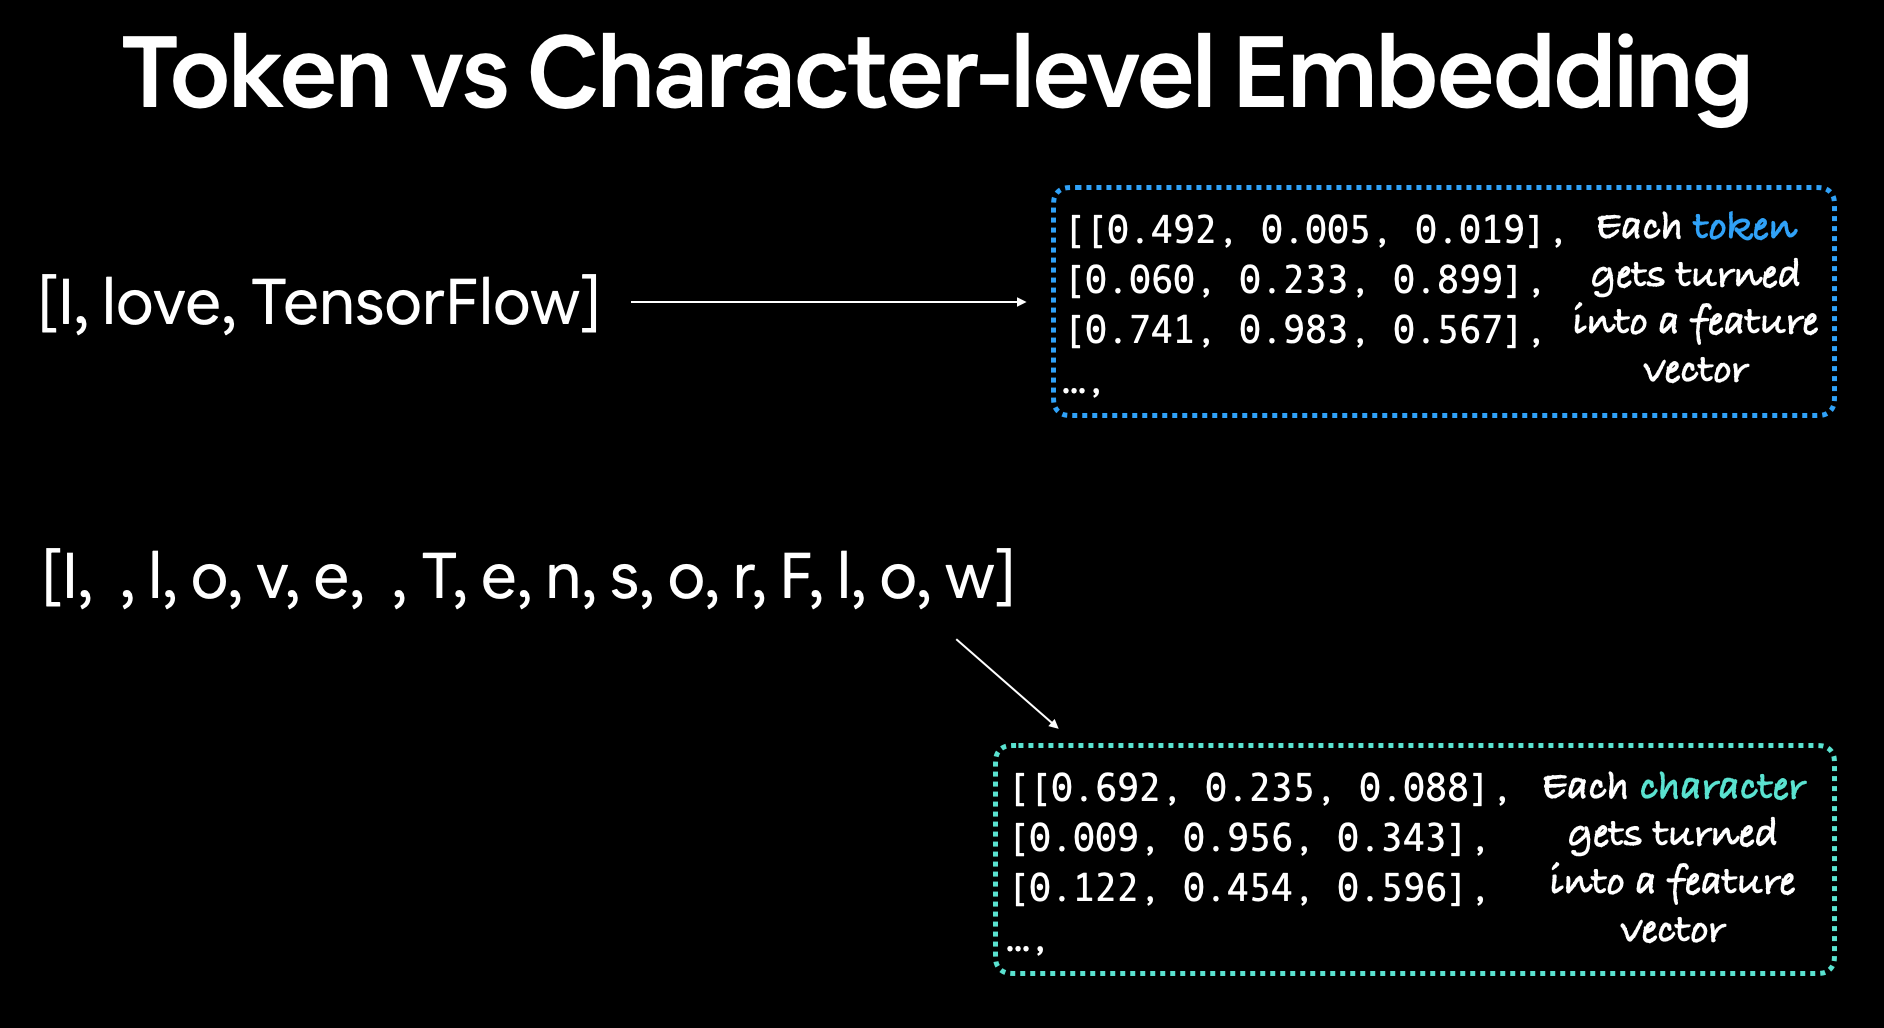

In [ ]:
# Split sentences into characters for character level vectorization
def split_chars(text_input):
  return " ".join(list(text_input))

In [ ]:
# Test the function
random_split_sentence = random.choice(train_sentences)
print(f"Random sentence: {random_split_sentence}")
print(f"Sentnece split into characters: {split_chars(random_split_sentence)}")

Random sentence: Ingestion of cold - and room-tempered water led to decreased heart rate ( P < @ ) and double product ( P < @ ) , and increased stroke volume ( P < @ ) ; these effects were not observed with body-tempered water .
Sentnece split into characters: I n g e s t i o n   o f   c o l d   -   a n d   r o o m - t e m p e r e d   w a t e r   l e d   t o   d e c r e a s e d   h e a r t   r a t e   (   P   <   @   )   a n d   d o u b l e   p r o d u c t   (   P   <   @   )   ,   a n d   i n c r e a s e d   s t r o k e   v o l u m e   (   P   <   @   )   ;   t h e s e   e f f e c t s   w e r e   n o t   o b s e r v e d   w i t h   b o d y - t e m p e r e d   w a t e r   .


In [ ]:
# Split sentences into chars
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

print(f"Train example: {train_chars[0]}")
print(f"Validation example: {val_chars[0]}")
print(f"Test example: {test_chars[0]}")

Train example: T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .
Validation example: I g E   s e n s i t i z a t i o n   t o   A s p e r g i l l u s   f u m i g a t u s   a n d   a   p o s i t i v e   s p u t u m   f u n g a l   c u l t u r e   r e s u l t   a r e   c o m m o n   i n   p a t i e n t s   w i t h   r e f r a c t o r y   a s t h m a   .
Test example: T h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i

In [ ]:
# What is the average number of characters in a sentence?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_lens = np.mean(char_lens)
mean_char_lens

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <a list of 7 Patch objects>)

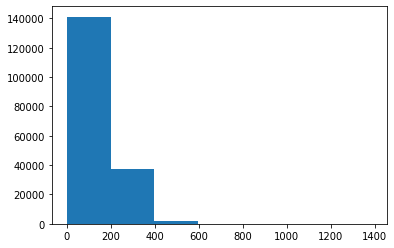

In [ ]:
# Check the character number distribution
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7)

In [ ]:
# Character length that covers 95% sentences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

- We will use output sequence as 290.
- We will use max_tokens (total number of different characters) as 28 (26 alphabets + 1 for spaces + 1 for OOV - Out of Vocabulary)

In [ ]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2 # alphabets + space + OOV
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    standardize="lower_and_strip_punctuation",
                                    output_sequence_length=output_seq_char_len,
                                    name="char_vectorizer")

char_vectorizer.adapt(train_chars)

In [ ]:
# Get vocabulary
char_vocab = char_vectorizer.get_vocabulary()
print(f"Length of the vocabulary: {len(char_vocab)}")
print(f"Most common chars: {char_vocab[:5]}")
print(f"Least common chars: {char_vocab[-5:]}")

Length of the vocabulary: 28
Most common chars: ['', '[UNK]', 'e', 't', 'i']
Least common chars: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test char_vectorizer on random chars
random_train_chars = random.choice(train_chars)
print(f"Chars before vectorizing: {random_train_chars}")
print(f"Length of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"Chars after vectorization: {vectorized_chars}")
print(f"Shape of vectorized chars: {vectorized_chars.shape}")

Chars before vectorizing: L a c t a t e   i s   a   m a r k e r   o f   h y p o p e r f u s i o n   a n d   m a y   b e   u s e d   f o r   r i s k   a s s e s s m e n t   i n   c r i t i c a l l y   i l l   p a t i e n t s   .
Length of chars: 84
Chars after vectorization: [[12  5 11  3  5  3  2  4  9  5 15  5  8 23  2  8  7 17 13 19 14  7 14  2
   8 17 16  9  4  7  6  5  6 10 15  5 19 22  2 16  9  2 10 17  7  8  8  4
   9 23  5  9  9  2  9  9 15  2  6  3  4  6 11  8  4  3  4 11  5 12 12 19
   4 12 12 14  5  3  4  2  6  3  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
# Create embedding
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                              output_dim=25, #embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, #if true, it messes up model_5
                              name="char_embed")

# Test embedding
print(f"Random sentence: {random_train_chars}")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Sentence after embedding: {char_embed_example}")
print(f"Shape of the embed: {char_embed_example.shape}")

Random sentence: L a c t a t e   i s   a   m a r k e r   o f   h y p o p e r f u s i o n   a n d   m a y   b e   u s e d   f o r   r i s k   a s s e s s m e n t   i n   c r i t i c a l l y   i l l   p a t i e n t s   .
Sentence after embedding: [[[ 0.00392711  0.02253857 -0.04150482 ...  0.00475938  0.02457154
   -0.00121703]
  [ 0.01806461 -0.04182393 -0.04648786 ...  0.00754659 -0.03691766
   -0.03903711]
  [-0.02057824  0.04847981 -0.0251959  ...  0.03905416 -0.00965115
    0.03187997]
  ...
  [-0.00375154  0.01728174 -0.03073191 ... -0.01172395  0.04441113
   -0.01540915]
  [-0.00375154  0.01728174 -0.03073191 ... -0.01172395  0.04441113
   -0.01540915]
  [-0.00375154  0.01728174 -0.03073191 ... -0.01172395  0.04441113
   -0.01540915]]]
Shape of the embed: (1, 290, 25)


**Steps:** Input(char of sentences) -> Tokenize -> Embedding -> Layer (Conv1D, GlobalMaxPool1D) -> Output (probability)

In [ ]:
# Create model
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_Conv1D_char_embedding")

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_Conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
# Create char level prefetch dataset
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
history_model_3 = model_3.fit(x=train_char_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2612 - accuracy: 0.4890 - val_loss: 1.0415 - val_accuracy: 0.5881
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0015 - accuracy: 0.5984 - val_loss: 0.9427 - val_accuracy: 0.6326
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9259 - accuracy: 0.6370 - val_loss: 0.8695 - val_accuracy: 0.6639


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8864 - accuracy: 0.6555


[0.8864233493804932, 0.655501127243042]

In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.19073394, 0.31212395, 0.16888037, 0.29404658, 0.03421513],
       [0.15484625, 0.5917733 , 0.00655731, 0.19130374, 0.05551943],
       [0.17633712, 0.10188666, 0.37478343, 0.2744039 , 0.07258891],
       ...,
       [0.02773403, 0.0632117 , 0.27672595, 0.02160899, 0.61071926],
       [0.0309303 , 0.1018874 , 0.207101  , 0.04321761, 0.6168637 ],
       [0.3833823 , 0.41076133, 0.07499465, 0.10069577, 0.0301661 ]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 2, ..., 4, 4, 1])>

In [ ]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 65.55011253806434,
 'precision': 0.647686987586961,
 'recall': 0.6555011253806434,
 'f1': 0.6435294551852216}

**Model 4:** pretrained token embeddings + pretrained character embeddings (hybrid embedding layer)
1. Create a token level embedding (model_1)
2. Create a character level embedding (model_3)
3. Combine the outputs of model_1 & model_3 using layers.Concatenate
4. Create a series of layers on top of concatenated layer https://arxiv.org/pdf/1612.05251.pdf
5. Create model with token and character inputs and probabilities as output


In [ ]:
# Token model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# Char model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# Concat
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# Create model
model_4 = tf.keras.Model(inputs=[token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name="model_4_token_char_embeddings")

In [ ]:
model_4.summary()

Model: "model_4_token_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['tok

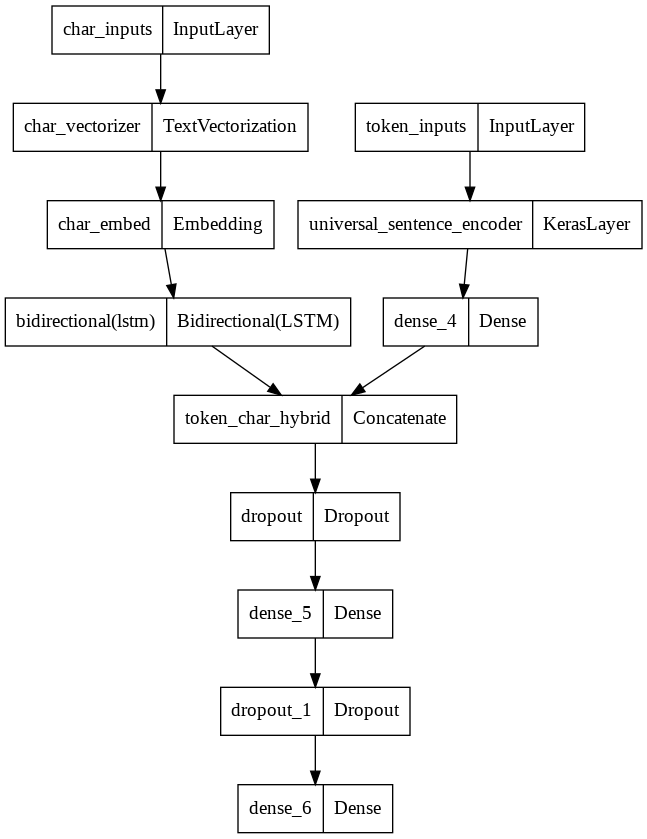

In [ ]:
# Visualize
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [ ]:
# Compile
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Combine char and token in a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

In [ ]:
# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Batch and prefetch validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Fit
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 29s 43ms/step - loss: 0.9642 - accuracy: 0.6145 - val_loss: 0.7776 - val_accuracy: 0.6981
Epoch 2/3
562/562 [==============================] - 28s 49ms/step - loss: 0.7942 - accuracy: 0.6947 - val_loss: 0.7091 - val_accuracy: 0.7324
Epoch 3/3
562/562 [==============================] - 26s 45ms/step - loss: 0.7689 - accuracy: 0.7053 - val_loss: 0.6907 - val_accuracy: 0.7380


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 30s 32ms/step - loss: 0.6930 - accuracy: 0.7339


[0.6929764151573181, 0.7339136600494385]

In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 22s 22ms/step


array([[4.6466997e-01, 2.9067549e-01, 2.5814699e-03, 2.3366107e-01,
        8.4119597e-03],
       [3.4228364e-01, 4.6081737e-01, 2.4462438e-03, 1.9220866e-01,
        2.2441680e-03],
       [3.2507840e-01, 9.1329262e-02, 4.1223250e-02, 5.1282269e-01,
        2.9546445e-02],
       ...,
       [8.7544677e-04, 6.3222409e-03, 4.9248297e-02, 2.7351844e-04,
        9.4328052e-01],
       [5.8404473e-03, 6.3533112e-02, 1.6442190e-01, 2.2370967e-03,
        7.6396745e-01],
       [2.8309169e-01, 4.0690666e-01, 2.3041908e-01, 3.9594531e-02,
        3.9987970e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.39136766847611,
 'precision': 0.735543378379661,
 'recall': 0.733913676684761,
 'f1': 0.7318795346401119}

**Model 5: Transfer learning + token embeddings + character embeddings + positional embeddings**

We are going to teach the model something that we know. We know in a paragrah, the headings usually come in sequence,

- OBJECTIVE ...
- METHODS ...
- METHODS ...
- METHODS ...
- RESULTS ...
- CONCLUSIONS ...

Or

- BACKGROUND ...
- OBJECTIVE ...
- METHODS ...
- METHODS ...
- RESULTS ...
- RESULTS ...
- CONCLUSIONS ...
- CONCLUSIONS ...

In [ ]:
# Inspect training dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,12
1,METHODS,A total of @ patients with primary knee OA wer...,1,12
2,METHODS,Outcome measures included pain reduction and i...,2,12
3,METHODS,Pain was assessed using the visual analog pain...,3,12
4,METHODS,Secondary outcome measures included the Wester...,4,12


We will use "line_number" and "total_lines" as positional embeddings

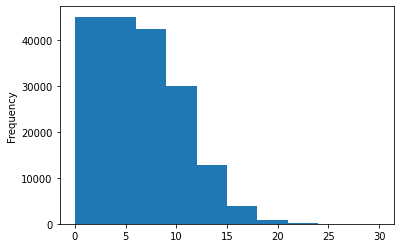

In [ ]:
# Plot how many lines in a paragraph
train_df.line_number.plot.hist()

Looks like most of the paragraphs are 15 lines or less

In [ ]:
# One-hot-encode line numbers
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]), <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

It goes back after 15th column

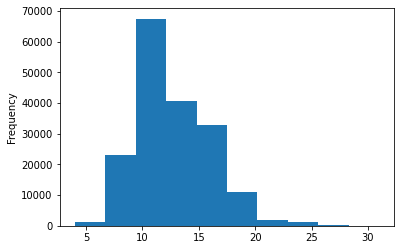

In [ ]:
# Check the same for total_lines
train_df.total_lines.plot.hist()

Looks like depth of 20 is most appropriate

In [ ]:
# Check the percentile
int(np.percentile(train_df.total_lines, 98))

21

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

In [ ]:
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

**Steps:**
1. Create a token model (model_1)
2. Create a character model (model_3)
3. Create a line_numbers model
4. Create a total_lines model
5. Combine output of 1 & 2 (token character hybrid)
6. Combine 3, 4 & 5 (token, character, positional hybrid)
7. Create output layer that accepts combined embedding
8. Create a model with inputs 1, 2, 3, 4 and outputs of 7

In [ ]:
# Token embedding
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# Char embedding
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vector = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vector)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

In [ ]:
# Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_inputs")
line_number_outputs = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=line_number_outputs)

# Total line inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_inputs")
total_lines_outputs = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(inputs=total_lines_inputs,
                                   outputs=total_lines_outputs)

In [ ]:
# Hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])

In [ ]:
x = layers.Dense(256, activation="relu")(combined_embeddings)
x = layers.Dropout(0.5)(x)

In [ ]:
# Combine token, char & positional embedding
x = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_lines_model.output,
                                                                x])

In [ ]:
# Output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(x)

In [ ]:
# Create model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [ ]:
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']     

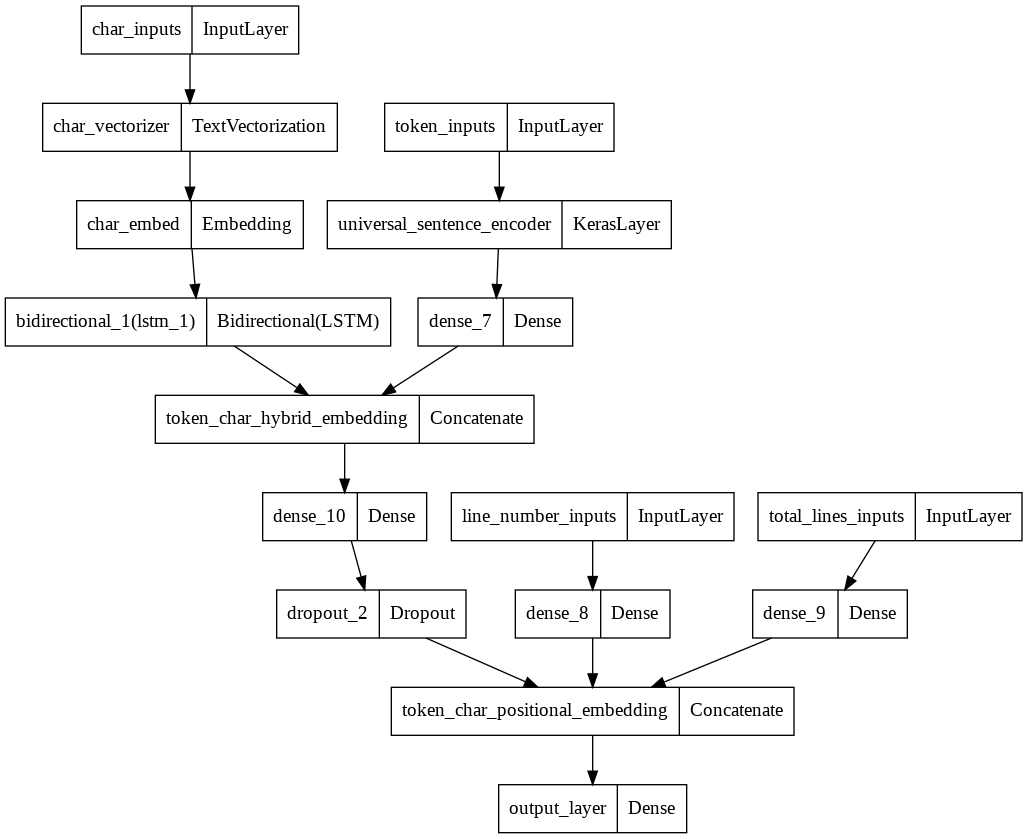

In [ ]:
# Plot
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [ ]:
# Check if a layer is trainable
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa4bd5e30d0> True
<keras.engine.input_layer.InputLayer object at 0x7fa4bd58deb0> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7fa3e4b3d880> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7fa510472760> False
<keras.layers.core.embedding.Embedding object at 0x7fa3e4a9bc10> True
<keras.layers.core.dense.Dense object at 0x7fa3e4ac7910> True
<keras.layers.rnn.bidirectional.Bidirectional object at 0x7fa4bd574820> True
<keras.layers.merging.concatenate.Concatenate object at 0x7fa4bd5ead00> True
<keras.engine.input_layer.InputLayer object at 0x7fa4bd4430d0> True
<keras.engine.input_layer.InputLayer object at 0x7fa4bd5411f0> True
<keras.layers.core.dense.Dense object at 0x7fa4bd4019d0> True
<keras.layers.core.dense.Dense object at 0x7fa4bd443130> True
<keras.layers.core.dense.Dense object at 0x7fa4bd4e9a00> True
<keras.layers.regularization.dropout.Dropout object at 0x7fa4bd5f4dc0> True
<keras.layers

In [ ]:
# Compile
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # label_smoothing helps prevent overfitting, more in https://pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/
                metrics=["accuracy"])

In [ ]:
# Create dataset
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                               train_total_lines_one_hot,
                                                               train_sentences,
                                                               train_chars))

train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)

In [ ]:
# Create prefetch dataset
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))

val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)

In [ ]:
# Create prefetch dataset
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Fit
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 45s 63ms/step - loss: 1.1018 - accuracy: 0.7161 - val_loss: 0.9849 - val_accuracy: 0.8035
Epoch 2/3
562/562 [==============================] - 28s 49ms/step - loss: 0.9684 - accuracy: 0.8135 - val_loss: 0.9494 - val_accuracy: 0.8285
Epoch 3/3
562/562 [==============================] - 28s 50ms/step - loss: 0.9515 - accuracy: 0.8227 - val_loss: 0.9384 - val_accuracy: 0.8295


In [ ]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 25s 25ms/step


array([[0.49413332, 0.10127036, 0.01047949, 0.37713832, 0.01697851],
       [0.5417913 , 0.09060247, 0.05408466, 0.3025037 , 0.01101779],
       [0.28260714, 0.09906197, 0.11837915, 0.43451664, 0.06543512],
       ...,
       [0.03938551, 0.118187  , 0.04579992, 0.03106225, 0.7655653 ],
       [0.03086356, 0.30725482, 0.07554682, 0.02818147, 0.5581533 ],
       [0.22560005, 0.57783824, 0.09733809, 0.04458239, 0.05464124]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 83.21196875413743,
 'precision': 0.8309215393264519,
 'recall': 0.8321196875413743,
 'f1': 0.8310160867750374}

In [ ]:
# Compare
all_model_results = pd.DataFrame({
    "baseline": baseline_results,
    "custom_token_embed_Conv1D": model_1_results,
    "pretrained_token_embed": model_2_results,
    "custom_char_embed_Conv1D": model_3_results,
    "hybrid_char_token_embed": model_4_results,
    "tribrid_pos_char_token_embed": model_5_results
})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_Conv1D,78.819674,0.785463,0.788197,0.785916
pretrained_token_embed,71.273004,0.713564,0.712730,0.709763
custom_char_embed_Conv1D,65.550113,0.647687,0.655501,0.643529
hybrid_char_token_embed,73.391368,0.735543,0.733914,0.731880
tribrid_pos_char_token_embed,83.211969,0.830922,0.832120,0.831016


In [ ]:
# Make accuracy same as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.721832,0.718647,0.721832,0.698925
custom_token_embed_Conv1D,0.788197,0.785463,0.788197,0.785916
pretrained_token_embed,0.712730,0.713564,0.712730,0.709763
custom_char_embed_Conv1D,0.655501,0.647687,0.655501,0.643529
hybrid_char_token_embed,0.733914,0.735543,0.733914,0.731880
tribrid_pos_char_token_embed,0.832120,0.830922,0.832120,0.831016


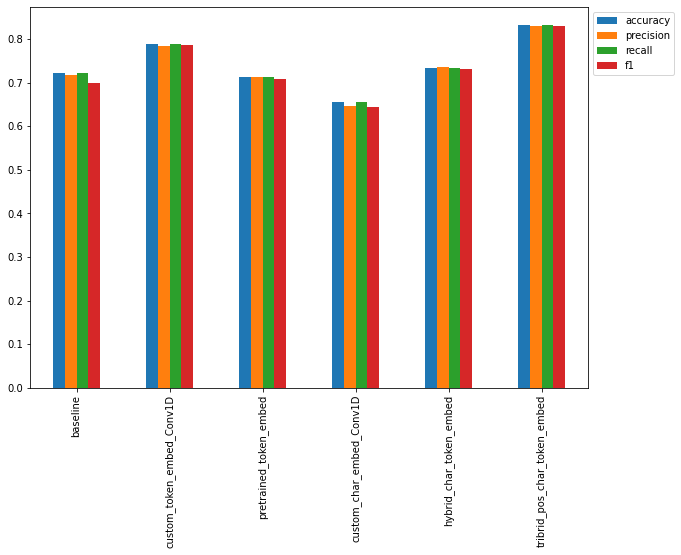

In [ ]:
# Visualize results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

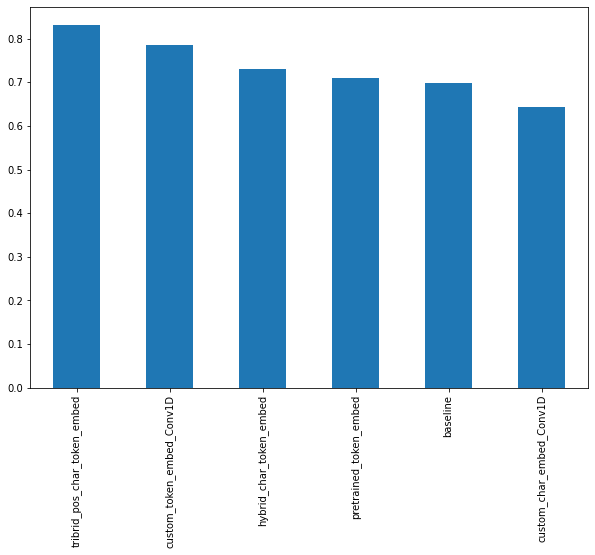

In [ ]:
# Sort by f1 score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7))

In [ ]:
# Save the best performing model
#model_5.save("skimlit_tribrid_model")

In [ ]:
# Mount google drive and save the model there
#!cp skimlit_tribrid_model -r /content/drive/MyDrive/dev/ai/models/SkimLit/

In [ ]:
# Load model from google drive
model_path = "/content/drive/MyDrive/dev/ai/models/SkimLit/skimlit_tribrid_model"

loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
# Predict using loaded model to make sure it's the same
loaded_model_pred_probs = loaded_model.predict(val_pos_char_token_dataset)
loaded_model_preds = tf.argmax(loaded_model_pred_probs, axis=1)
loaded_model_preds

945/945 [==============================] - 29s 30ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
loaded_model_results = calculate_results(y_true=val_labels_encoded,
                                         y_pred=loaded_model_preds)
loaded_model_results

{'accuracy': 83.19210909572355,
 'precision': 0.8309827414032934,
 'recall': 0.8319210909572355,
 'f1': 0.8310536143770747}

Evaluate model on test dataset

In [ ]:
# Create test dataset
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                              test_total_lines_one_hot,
                                                              test_sentences,
                                                              test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)

In [ ]:
# batch and prefetch dataset
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Predict on test dataset
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 26s 28ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 4, 0])>

In [ ]:
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.71113323378133,
 'precision': 0.8257567232854857,
 'recall': 0.8271113323378132,
 'f1': 0.8261326120086616}

Find most wrong

In [ ]:
# Convert integer into prediction classes
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes[:10]

['OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND']

In [ ]:
# Create prediction, probability and correct in the dataframe
test_df["prediction"] = test_pred_classes
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy()
test_df["correct"] = test_df["prediction"] == test_df["target"]
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,This study analyzed liver function abnormaliti...,0,9,OBJECTIVE,0.529816,False
1,RESULTS,A post hoc analysis was conducted with the use...,1,9,OBJECTIVE,0.335167,False
2,RESULTS,Liver function tests ( LFTs ) were measured at...,2,9,METHODS,0.796329,False
3,RESULTS,Survival analyses were used to assess the asso...,3,9,METHODS,0.577112,False
4,RESULTS,The percentage of patients with abnormal LFTs ...,4,9,RESULTS,0.693875,True
5,RESULTS,When mean hemodynamic profiles were compared i...,5,9,RESULTS,0.878977,True
6,RESULTS,Multivariable analyses revealed that patients ...,6,9,RESULTS,0.534117,True
7,CONCLUSIONS,Abnormal LFTs are common in the ADHF populatio...,7,9,CONCLUSIONS,0.499441,True
8,CONCLUSIONS,Elevated MELD-XI scores are associated with po...,8,9,RESULTS,0.470170,False
9,BACKGROUND,Minimally invasive endovascular aneurysm repai...,0,13,BACKGROUND,0.568836,True


In [ ]:
# Find 20 most wrong predictions
top_20_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:20]
top_20_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
1827,CONCLUSIONS,NCT@ ( ClinicalTrials.gov ) .,18,19,BACKGROUND,0.954230,False
8545,METHODS,Pretest-posttest .,1,12,BACKGROUND,0.934165,False
13874,CONCLUSIONS,Symptom outcomes will be assessed and estimate...,4,7,METHODS,0.927726,False
14108,CONCLUSIONS,Unique identifier : NCT@ .,15,16,BACKGROUND,0.927270,False
16633,CONCLUSIONS,CLINICALTRIALS.GOV IDENTIFIER : NCT@ .,19,20,BACKGROUND,0.922607,False
18720,RESULTS,non-diffuse-trickling '' ) .,8,16,BACKGROUND,0.920399,False
2388,RESULTS,The primary endpoint is the cumulative three-y...,4,14,METHODS,0.920212,False
26912,CONCLUSIONS,( ClinicalTrials.gov : NCT@ ) .,13,14,BACKGROUND,0.919662,False
13598,METHODS,-@ % vs. Fish : -@ % vs. Fish + S : -@ % ; p <...,6,10,RESULTS,0.915192,False
17399,METHODS,Clinicaltrials.gov identifier : NCT@ .,4,10,BACKGROUND,0.912852,False


Now predict on real data

In [ ]:
# Get some real paragraph
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

--2023-01-01 05:06:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-01-01 05:06:28 (64.4 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



In [ ]:
# Load paragraphs
import json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [ ]:
# Convert paragraph into sentences using spaCy
from spacy.lang.en import English
nlp = English() # setup english language parser
nlp.add_pipe("sentencizer")
doc = nlp(example_abstracts[0]["abstract"]) # get the first abstract
abstract_lines = [str(sent) for sent in list(doc.sents)]
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

Preprocess data

In [ ]:
# Total line numbers
total_lines_in_sample = len(abstract_lines)

sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)

sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [ ]:
# Get all line numbers
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# one-hot-encode to same depth as training data so input shape remains the same
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Do the same for total lines
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Split sentences into chars
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [ ]:
# Predict
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 2s 2s/step


array([[0.28259182, 0.14917214, 0.0172959 , 0.5294553 , 0.0214848 ],
       [0.08393656, 0.0359957 , 0.7279035 , 0.08965264, 0.06251159],
       [0.13937096, 0.07206133, 0.50658345, 0.18892379, 0.09306046],
       [0.09460465, 0.1906193 , 0.51156586, 0.0764259 , 0.1267843 ],
       [0.05120696, 0.12492478, 0.43507734, 0.04458541, 0.34420547],
       [0.03302595, 0.12631787, 0.60855776, 0.03626276, 0.1958356 ],
       [0.03218795, 0.19121997, 0.10112908, 0.02749811, 0.6479649 ],
       [0.01934974, 0.1431755 , 0.23345046, 0.03369519, 0.5703291 ]],
      dtype=float32)

In [ ]:
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 2, 2, 4, 4])>

In [ ]:
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Visualize
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
